Imports

In [18]:
import tensorflow as tf

from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the data

In [19]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [20]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


Build the model

In [23]:
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(K, activation='softmax')(x)
model = Model(i, x)
model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Train the model

In [24]:
r = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.3273 - accuracy: 0.8954 - val_loss: 0.1103 - val_accuracy: 0.9661
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1069 - accuracy: 0.9680 - val_loss: 0.0854 - val_accuracy: 0.9751
Epoch 3/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0735 - accuracy: 0.9784 - val_loss: 0.0908 - val_accuracy: 0.9699
Epoch 4/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0575 - accuracy: 0.9828 - val_loss: 0.0746 - val_accuracy: 0.9779
Epoch 5/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0446 - accuracy: 0.9859 - val_loss: 0.0555 - val_accuracy: 0.9828
Epoch 6/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0376 - accuracy: 0.9884 - val_loss: 0.0500 - val_accuracy: 0.9847
Epoch 7/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0333 - accuracy: 0.9897 - val_loss: 0.0505 -

Plot loss per iteration

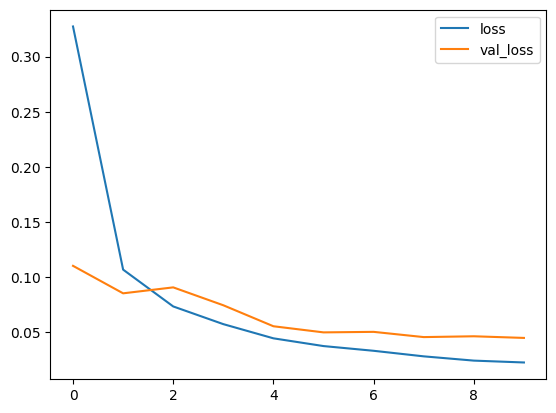

In [25]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

Plot accuracy per iteration

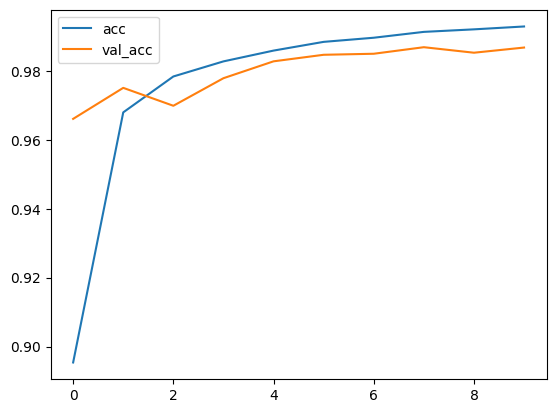

In [26]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

Plot confusion matrix

313/313 [==============================] - 7s 19ms/step
Confusion matrix, without normalization
[[ 976    0    0    0    0    0    3    1    0    0]
 [   2 1126    1    1    0    1    2    2    0    0]
 [   0    0 1026    0    1    0    1    3    1    0]
 [   0    0    6 1004    0    0    0    0    0    0]
 [   0    0    0    0  967    0    6    2    2    5]
 [   3    0    1   10    0  873    2    1    1    1]
 [   1    2    0    0    2    2  949    0    2    0]
 [   0    2    9    0    1    0    0 1013    1    2]
 [   5    0    6    6    1    4    1    3  948    0]
 [   0    1    0    0    9    0    2    4    7  986]]


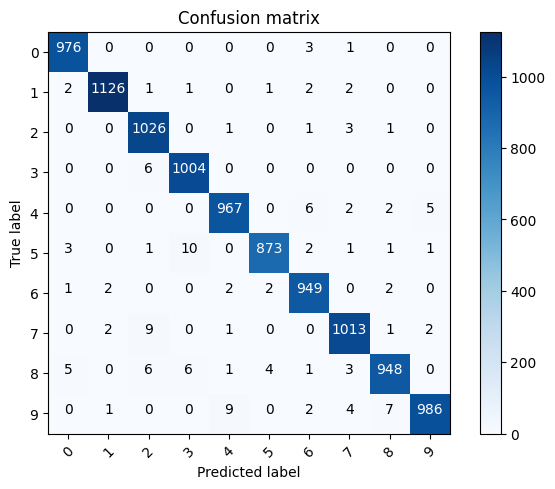

In [27]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.

Show some misclassified examples

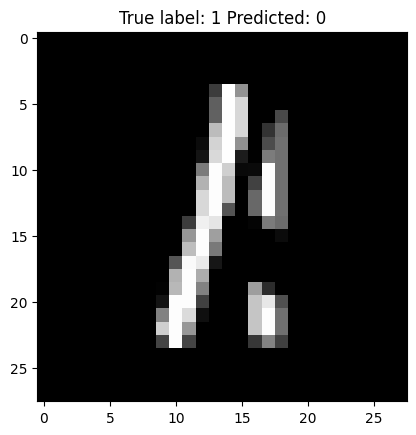

In [32]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));
